In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
df = gpd.read_file(r'data/LSMD_CONT_UJ201_서울/LSMD_CONT_UJ201_11_202307.shp', encoding='cp949')
df.head()

,ALIAS,REMARK,NTFDATE,COL_ADM_SE,SGG_OID,MNUM,geometry
0,None,None,20140403,11110,354,61100001111020140001UJB1000001001,"POLYGON ((196058.321 455188.028, 196058.766 45..."
1,None,None,20140403,11110,353,61100001111020140001UJB4000001001,"POLYGON ((196092.826 455168.413, 196093.086 45..."
2,None,한강(팔당댐~하구),None,11170,65,15001851117020200099UJB1000001001,"POLYGON ((195031.903 447949.045, 195033.860 44..."
3,None,None,20121210,11200,36,16110001120020120415UJB1000001001,"POLYGON ((202157.499 449157.467, 202184.641 44..."
4,None,None,None,11200,35,15000001120020050002UJB1000001001,"POLYGON ((204369.546 448174.296, 204370.601 44..."


<Axes: >

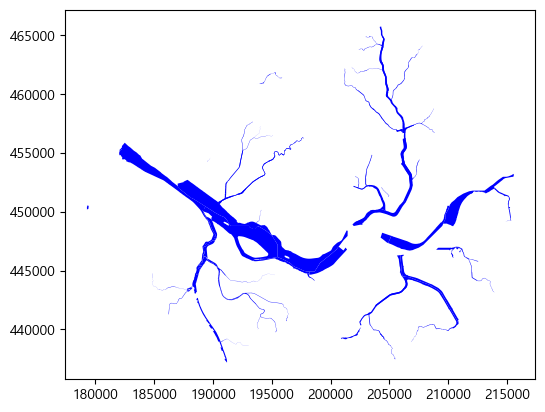

In [3]:
%matplotlib inline
df.plot(color='blue')

In [4]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [5]:
df.shape

(88, 7)

In [6]:
df.columns

Index(['ALIAS', 'REMARK', 'NTFDATE', 'COL_ADM_SE', 'SGG_OID', 'MNUM',
       'geometry'],
      dtype='object')

In [7]:
df.geom_type

0          Polygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
          ...     
83    MultiPolygon
84    MultiPolygon
85         Polygon
86         Polygon
87         Polygon
Length: 88, dtype: object

In [8]:
df.crs

<Projected CRS: EPSG:5174>
Name: Korean 1985 / Modified Central Belt
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - between 126°E and 128°E - mainland and nearshore.
- bounds: (126.0, 33.96, 128.0, 38.33)
Coordinate Operation:
- name: Korea Modified Central Belt
- method: Transverse Mercator
Datum: Korean Datum 1985
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [11]:
# folium 좌표계는 EPSG:4326을 적용하여야 정상적으로 시각화가 가능하다.
merc = df.to_crs({'init':'EPSG:4326'})

c:\Users\hw981\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [13]:
merc

,ALIAS,REMARK,NTFDATE,COL_ADM_SE,SGG_OID,MNUM,geometry
0,None,None,20140403,11110,354,61100001111020140001UJB1000001001,"POLYGON ((126.95615 37.59900, 126.95616 37.599..."
1,None,None,20140403,11110,353,61100001111020140001UJB4000001001,"POLYGON ((126.95654 37.59883, 126.95655 37.598..."
2,None,한강(팔당댐~하구),None,11170,65,15001851117020200099UJB1000001001,"POLYGON ((126.94458 37.53378, 126.94460 37.533..."
3,None,None,20121210,11200,36,16110001120020120415UJB1000001001,"POLYGON ((127.02520 37.54467, 127.02551 37.544..."
4,None,None,None,11200,35,15000001120020050002UJB1000001001,"POLYGON ((127.05023 37.53581, 127.05024 37.535..."
...,...,...,...,...,...,...,...
83,None,None,20151210,11710,1281,61100001171020150386UJB1000001001,"MULTIPOLYGON (((127.06782 37.51906, 127.07112 ..."
84,None,None,20151210,11710,321,61100001171020150386UJB4000001001,"MULTIPOLYGON (((127.12021 37.52433, 127.12023 ..."
85,고덕천,고덕천,None,11740,354,61100001174020150386UJB1000001002,"POLYGON ((127.15814 37.56995, 127.15863 37.570..."
86,대사골천,대사골천,None,11740,353,61100001174020150386UJB1000001001,"POLYGON ((127.16918 37.54499, 127.16923 37.545..."


In [14]:
merc.to_file(driver='GeoJSON', filename='use_data/서울시_하천.geojson')

In [2]:
df = gpd.read_file(r'data/서울시_녹지대/TN_GRNZN_W.shp', encoding='cp949')
df.head()

,GRNZN_ID,GLD_NAM,GLD_ADDR_K,GRNZN_CL,GLD_CTN_YE,GRNZN_AR,LDHC_QY,GU_NM,GU_CODE_SE,CREAT_DE,PO_FE_NM,SHAPE_AREA,SHAPE_LEN,geometry
0,0,올림픽로 분리대,None,중앙분리대,0,28907.0,0.0,송파구,710,None,None,2.774056e-07,0.003213,"POLYGON ((127.10107 37.51383, 127.10106 37.513..."
1,0,성내천둔치공원(오금동),None,하천변조경,0,26390.0,0.0,송파구,710,None,None,1.602252e-07,0.004697,"POLYGON ((127.13698 37.50381, 127.13709 37.503..."
2,0,풍납마을마당,None,휴게소,0,1192.0,0.0,송파구,710,None,None,1.375662e-07,0.001457,"POLYGON ((127.11337 37.52738, 127.11338 37.527..."
3,0,신암중학교,암사동444,건물조경,0,1200.0,0.0,강동구,740,None,None,2.870575e-08,0.000793,"POLYGON ((127.13273 37.55612, 127.13303 37.556..."
4,0,일원가로공원,일원동,가로녹지대,0,10771.0,0.0,강남구,680,None,None,7.854354e-07,0.008103,"POLYGON ((127.07341 37.49738, 127.07343 37.496..."


<Axes: >

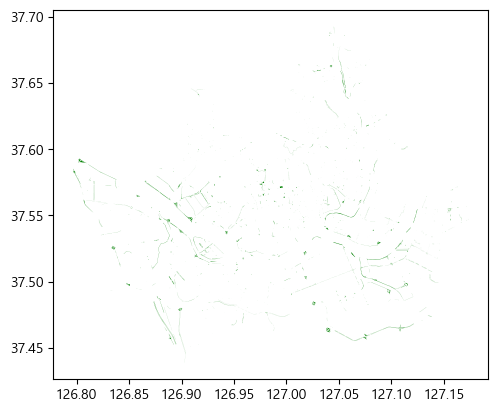

In [4]:
%matplotlib inline
df.plot(color='green')

In [5]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [6]:
df.shape

(2249, 14)

In [7]:
df.columns

Index(['GRNZN_ID', 'GLD_NAM', 'GLD_ADDR_K', 'GRNZN_CL', 'GLD_CTN_YE',
       'GRNZN_AR', 'LDHC_QY', 'GU_NM', 'GU_CODE_SE', 'CREAT_DE', 'PO_FE_NM',
       'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

In [8]:
df.geom_type

0       Polygon
1       Polygon
2       Polygon
3       Polygon
4       Polygon
         ...   
2244    Polygon
2245    Polygon
2246    Polygon
2247    Polygon
2248    Polygon
Length: 2249, dtype: object

In [9]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# folium 좌표계는 EPSG:4326을 적용하여야 정상적으로 시각화가 가능하다.
merc = df.to_crs({'init':'EPSG:4326'})

c:\Users\hw981\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [11]:
merc

,GRNZN_ID,GLD_NAM,GLD_ADDR_K,GRNZN_CL,GLD_CTN_YE,GRNZN_AR,LDHC_QY,GU_NM,GU_CODE_SE,CREAT_DE,PO_FE_NM,SHAPE_AREA,SHAPE_LEN,geometry
0,0,올림픽로 분리대,None,중앙분리대,0,28907.0,0.0,송파구,710,None,None,2.774056e-07,0.003213,"POLYGON ((127.10107 37.51383, 127.10106 37.513..."
1,0,성내천둔치공원(오금동),None,하천변조경,0,26390.0,0.0,송파구,710,None,None,1.602252e-07,0.004697,"POLYGON ((127.13698 37.50381, 127.13709 37.503..."
2,0,풍납마을마당,None,휴게소,0,1192.0,0.0,송파구,710,None,None,1.375662e-07,0.001457,"POLYGON ((127.11337 37.52738, 127.11338 37.527..."
3,0,신암중학교,암사동444,건물조경,0,1200.0,0.0,강동구,740,None,None,2.870575e-08,0.000793,"POLYGON ((127.13273 37.55612, 127.13303 37.556..."
4,0,일원가로공원,일원동,가로녹지대,0,10771.0,0.0,강남구,680,None,None,7.854354e-07,0.008103,"POLYGON ((127.07341 37.49738, 127.07343 37.496..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,0,육사후문녹지대,공릉동223-24,광장녹지,0,680.0,1151.0,노원구,350,None,None,2.119674e-07,0.002603,"POLYGON ((127.09512 37.62615, 127.09566 37.625..."
2245,0,테헤란로분리대,None,분리녹지대,0,8253.0,0.0,강남구,680,None,None,4.000046e-08,0.001864,"POLYGON ((127.03716 37.50091, 127.03799 37.501..."
2246,0,역촌마을마당,"역촌1동2-108,9번지",휴게소,0,230.0,1295.0,은평구,380,None,None,2.228218e-08,0.000627,"POLYGON ((126.91956 37.60849, 126.91958 37.608..."
2247,0,잠원동녹지대,경부고속도로주흥교,광장녹지,0,3300.0,0.0,서초구,650,None,None,1.440538e-07,0.003587,"POLYGON ((127.01606 37.50936, 127.01622 37.508..."


In [12]:
merc.to_file(driver='GeoJSON', filename='use_data/서울시_녹지.geojson')